In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
filepath = r'D:\Project\jupyter\machinelearning\watermelon3_0.csv'

In [18]:
#df = pd.read_csv('lenses.csv', sep = '\t')
df = pd.read_csv('watermelon3_0b.csv')
if '编号' in df.columns:
    del df['编号']
print(df.columns)
print(df)
# print(df.shape)
# print(df.iloc[[0,1]])
# print(df.loc[[0,1]])
#dataMat = df.values

Index(['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '好瓜'], dtype='object')
    色泽  根蒂  敲声  纹理  脐部  触感 好瓜
0   青绿  蜷缩  浊响  清晰  凹陷  硬滑  是
1   乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  是
2   乌黑  蜷缩  浊响  清晰  凹陷  硬滑  是
3   青绿  蜷缩  沉闷  清晰  凹陷  硬滑  是
4   浅白  蜷缩  浊响  清晰  凹陷  硬滑  是
5   青绿  稍蜷  浊响  清晰  稍凹  软粘  是
6   乌黑  稍蜷  浊响  稍糊  稍凹  软粘  是
7   乌黑  稍蜷  浊响  清晰  稍凹  硬滑  是
8   乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  否
9   青绿  硬挺  清脆  清晰  平坦  软粘  否
10  浅白  硬挺  清脆  模糊  平坦  硬滑  否
11  浅白  蜷缩  浊响  模糊  平坦  软粘  否
12  青绿  稍蜷  浊响  稍糊  凹陷  硬滑  否
13  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑  否
14  乌黑  稍蜷  浊响  清晰  稍凹  软粘  否
15  浅白  蜷缩  浊响  模糊  平坦  硬滑  否
16  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑  否


In [5]:
grouped = df.groupby(['clas']).groups
#print(grouped)
# print(group.values())
ind = grouped['soft']
print(ind)
df.loc[ind]
# print(df['密度'])
# set(df['密度'])
# len(df[df['密度']> 0.381])
# len(df[df['密度']< 0.381])

KeyError: 'clas'

In [5]:
df_train = df.loc[[0,1,2,5,6,9,13,14,15,16]]
df_val = df.loc[[3,4,7,8,10,11,12]]
print(df_train, df_val)

    色泽  根蒂  敲声  纹理  脐部  触感 好瓜
0   青绿  蜷缩  浊响  清晰  凹陷  硬滑  是
1   乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  是
2   乌黑  蜷缩  浊响  清晰  凹陷  硬滑  是
5   青绿  稍蜷  浊响  清晰  稍凹  软粘  是
6   乌黑  稍蜷  浊响  稍糊  稍凹  软粘  是
9   青绿  硬挺  清脆  清晰  平坦  软粘  否
13  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑  否
14  乌黑  稍蜷  浊响  清晰  稍凹  软粘  否
15  浅白  蜷缩  浊响  模糊  平坦  硬滑  否
16  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑  否     色泽  根蒂  敲声  纹理  脐部  触感 好瓜
3   青绿  蜷缩  沉闷  清晰  凹陷  硬滑  是
4   浅白  蜷缩  浊响  清晰  凹陷  硬滑  是
7   乌黑  稍蜷  浊响  清晰  稍凹  硬滑  是
8   乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  否
10  浅白  硬挺  清脆  模糊  平坦  硬滑  否
11  浅白  蜷缩  浊响  模糊  平坦  软粘  否
12  青绿  稍蜷  浊响  稍糊  凹陷  硬滑  否


In [6]:
l = [1, 3, 2, 5, 1 , 4]
print(l.sort())
print(l)
l1 = list(set(l))
print(l1)
ls = l1.sort()
print(ls)
print(list(set([1,3,4,2,1])).sort())

None
[1, 1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
None
None


In [6]:
"""
input:
    dataframe:样本集
    class_atrr:决策属性
output:
    ShannonEntropy
"""

def Ent(dataframe, clas_atrr):
    row, col = dataframe.shape
    grouped_atrr = dataframe.groupby(by = clas_atrr).groups
    p = []
    for key in grouped_atrr:
        p.append(len(grouped_atrr[key])/row)
    ent = 0
    for value in p:
        ent += -(value * math.log(value, 2)) 
#         print(ent)
    return ent

In [7]:
"""
input:
    dataframe:样本集
    atrr:对属性atrr对样本集进行划分所获得的 "信息增益"
output:
    属性atrr对样本集进行划分所获得的信息增益
"""
def Gain(dataframe, atrr, clas_atrr):
    row, col = dataframe.shape
    grouped_atrr = dataframe.groupby(atrr).groups
    entv_tot = 0
    for key in grouped_atrr:
        ind = grouped_atrr[key]
        dfv = dataframe.loc[ind]
        entv_tot += (len(grouped_atrr[key])/row) * Ent(dfv, clas_atrr) 
#         print(entv_tot)
    gain = Ent(dataframe, clas_atrr) - entv_tot
    
    return gain

In [8]:
"""
input:
    dataframe:样本集
    连续属性atrr:对属性atrr对样本集进行划分所获得的 "信息增益"
output:
    属性atrr对样本集进行划分所获得的信息增益
"""
def GainCont(dataframe, atrr, clas_atrr = 'clas'):
    row, col = dataframe.shape
    data_atrr = df[atrr]
    values = list(set(data_atrr)); values.sort()
    Ta = [(values[i]+values[i+1])/2 for i in range(len(values)-1)]
    ent_t_all = []
    for t in Ta:
        group_pos = dataframe[dataframe[atrr] >= t]
        group_neg = dataframe[dataframe[atrr] < t ]
#         grouped_pos = group_pos.groupby(by = clas_atrr).groups
#         grouped_neg = group_neg.groupby(by = clas_atrr).groups
        ent_t = (len(group_pos)/row)*Ent(group_pos, clas_atrr) + (len(group_neg)/row*Ent(group_neg, clas_atrr))
        ent_t_all.append(ent_t)
    ent_d = Ent(dataframe, clas_atrr)   
    gain_all = [ent_d-v for v in ent_t_all]
    gain_t = max(gain_all)
    ind = gain_all.index(gain_t)
    
    return gain_t, Ta[ind]

In [9]:
# GainCont(df, '含糖率', '好瓜')

In [20]:
"""
input:
    dataframe:样本集
    A:属性集
    clas_atrr:决策属性
output:
    以node 为根节点的一棵决策树
"""
def TreeGenerate(dataframe, A, clas_atrr , df):
#     decisionTree = {}
    #groupedA = dataframe.groupby(by = A).groups
    grouped = dataframe.groupby(by = clas_atrr).groups
#     clas = dataframe[clas_atrr]; del dataframe[clas_atrr]
    if len(grouped) == 1:
        return list(grouped.keys())[0]
    if len(A) == 0 :
        return list(grouped.keys())[0]
    groupedA = dataframe.groupby(by = A).groups
    if len(groupedA) == 1:
        return list(grouped.keys())[0]
    gain_atrr = []
#     for atrr in A:
#         if atrr == '密度' or atrr == '含糖量'：
#             gaincont,sep = GainCont(dataframe, atrr, clas_atrr)
#             gain_atrr.append(gaincont)
#         else:
#             gain_atrr.append(Gain(dataframe, atrr, clas_atrr))
    for atrr in A:
        gain_atrr.append(Gain(dataframe, atrr, clas_atrr))
    ind_best = gain_atrr.index(max(gain_atrr))
    a_best = A[ind_best]
    decisionTree = {a_best:{}}; del A[ind_best]
#     dataframe[clas_atrr] = clas
    grouped_a_best = dataframe.groupby(by = a_best).groups
    print(grouped_a_best)
    groupeddf = df.groupby(by = a_best).groups
    cnt = 0
    for key in groupeddf:
        print(key)
        if not key in grouped_a_best:
            list_g = list(grouped.values())
            list_num = [len(v) for v in list_g]  
            decisionTree[a_best][key] = list(grouped.keys())[list_num.index(max([len(v) for v in list_g]))]
            continue
        subA = A[:]
        print(subA)
        ind = grouped_a_best[key]
        dfv = dataframe.loc[ind]
        #print(dfv)
        decisionTree[a_best][key] = TreeGenerate(dfv, subA, clas_atrr, df)
    
    return decisionTree

In [21]:
A = list(df);A.remove('好瓜')
print(A)
decisionTree = TreeGenerate(df, A, '好瓜', df)
print(decisionTree)

['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']
{'模糊': Int64Index([10, 11, 15], dtype='int64'), '清晰': Int64Index([0, 1, 2, 3, 4, 5, 7, 9, 14], dtype='int64'), '稍糊': Int64Index([6, 8, 12, 13, 16], dtype='int64')}
模糊
['色泽', '根蒂', '敲声', '脐部', '触感']
清晰
['色泽', '根蒂', '敲声', '脐部', '触感']
{'硬挺': Int64Index([9], dtype='int64'), '稍蜷': Int64Index([5, 7, 14], dtype='int64'), '蜷缩': Int64Index([0, 1, 2, 3, 4], dtype='int64')}
硬挺
['色泽', '敲声', '脐部', '触感']
稍蜷
['色泽', '敲声', '脐部', '触感']
{'乌黑': Int64Index([7, 14], dtype='int64'), '青绿': Int64Index([5], dtype='int64')}
乌黑
['敲声', '脐部', '触感']
{'硬滑': Int64Index([7], dtype='int64'), '软粘': Int64Index([14], dtype='int64')}
硬滑
['敲声', '脐部']
软粘
['敲声', '脐部']
浅白
青绿
['敲声', '脐部', '触感']
蜷缩
['色泽', '敲声', '脐部', '触感']
稍糊
['色泽', '根蒂', '敲声', '脐部', '触感']
{'硬滑': Int64Index([8, 12, 13, 16], dtype='int64'), '软粘': Int64Index([6], dtype='int64')}
硬滑
['色泽', '根蒂', '敲声', '脐部']
软粘
['色泽', '根蒂', '敲声', '脐部']
{'纹理': {'模糊': '否', '清晰': {'根蒂': {'硬挺': '否', '稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '是', '软粘': '否'}}, 

In [13]:
decisionNode = dict(boxstyle = 'sawtooth', fc = '0.8')
leafNode = dict(boxstyle = 'round4', fc = '0.8')
arrow_args = dict(arrowstyle = '<-')

In [14]:
def getNumLeafs(decisionTree):
    numLeafs = 0
    firstStr = list(decisionTree.keys())[0]
    print(firstStr)
    #print(type(type(decisionTree)))
    secondDict = decisionTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    
    return numLeafs

In [15]:
def getTreeDepth(decisionTree):
    maxDepth = 0
    firstStr = list(decisionTree.keys())[0]
    secondDict = decisionTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth:maxDepth = thisDepth
    
    return maxDepth

In [16]:
getTreeDepth(decisionTree)

4

In [17]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    

In [18]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [19]:
def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [20]:
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

tear
asti
age
prescription
prescription
age
tear
asti
age
prescription
prescription
age
asti
age
prescription
prescription
age
age
prescription
prescription
prescription
age
age


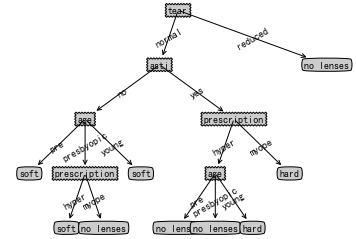

In [51]:
createPlot(decisionTree)

In [22]:
"""
input: 
    tree: 训练好的模型decisionTree
    A:属性标签
    x:需要预测的object
output:
    预测分类结果
"""
def classify_by_decisionTree(tree, A, x):
    firstkey = list(tree.keys())[0]
    secondDict = tree[firstkey]
    atrr_ind = A.index(firstkey)
    for key in secondDict.keys():
        if x[atrr_ind] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify_by_decisionTree(secondDict[key], A, x)
            else:
                classLabel = secondDict[key]
    
    return classLabel

In [23]:
x =['乌黑','蜷缩','沉闷','清晰','凹陷','硬滑']
A = list(df)
classify_by_decisionTree(decisionTree, A, x)

'是'

In [38]:
"""
    决策树的存储与读取
"""
import pickle  #使用pickle
import json  #使用json

def storeTree(tree, filename):
    f = open(filename, 'wb')
    pickle.dump(tree, f)
    f.close()
def grabTree(filename):
    f = open(filename, 'rb')
    tree = pickle.load(f)
    f.close()
    return tree

def storeTree_j(tree, filename):
    f = open(filename, 'w')
    json.dump(tree, f)
    f.close()
def grabTree_j(filename):
    f = open(filename)
    tree = json.load(f)
    f.close()
    return tree

In [36]:
storeTree_j(decisionTree, 'json.txt')

In [32]:
decisionTree

{'纹理': {'模糊': '否',
  '清晰': {'根蒂': {'硬挺': '否',
    '稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '是', '软粘': '否'}}, '浅白': '是', '青绿': '是'}},
    '蜷缩': '是'}},
  '稍糊': {'触感': {'硬滑': '否', '软粘': '是'}}}}

In [39]:
tree = grabTree_j('json.txt')
print(tree)

{'纹理': {'模糊': '否', '清晰': {'根蒂': {'硬挺': '否', '稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '是', '软粘': '否'}}, '浅白': '是', '青绿': '是'}}, '蜷缩': '是'}}, '稍糊': {'触感': {'硬滑': '否', '软粘': '是'}}}}
